## Overview

This notebook enables tracking the performance of several mice across sessions for a set of behavioral parameters.

### Prerequisites

- The behavioral parameters must be saved in pickle files during the processing of foraging sessions with `Behavior_Analysis.ipynb`.

### Structure

This notebook is based on two main components:
1. **Data Loading**: Loads specified data from pickle files across sessions and animals using the `load_pickle_data` function, returning a data dictionary.
2. **Plot Generation**: Generates plots to visualize the performance metrics.


In [1]:
import os
import pickle
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt #Creation de graphiques et de visualisations comme matlab
from matplotlib.patches import Polygon #Creation de graphiques et de visualisations comme matlab
from matplotlib import cm
import matplotlib.patches as mpatches
import gc
import glob
import time
from behavior_analysis_functions import list_sessions_analyzed, \
                                    process_session, html_mouse, load_data, MOUSE_STRING


In [2]:
# the path_to_data_folder is the path of the folder where you store your different mice.

# Windows:
# path_to_data_folder='C:'+os.sep+'Users'+os.sep+'MORVAN'+os.sep+'Documents'+os.sep+'patchouris'+os.sep+'Sample_Data'+os.sep
# Linux:
# path_to_data_folder '/home/david/Documents/Code/ForagingProject/Patchouris/patchouris/Sample_Data/'
# MacOs
# path_to_data_folder = '/Users/davidrobbe/Documents/Science/Data/ForagingMice/'

path_to_data_folder='/home/david/Documents/David/Data/'

#path_to_data_folder = '/Users/davidrobbe/Documents/Science/Data/ForagingMice/'

# List all mice in the data folder (If you want to process all the mice in your data folder),
mice_list = [os.path.basename(path) for path in glob.glob(path_to_data_folder + "/MOU*")]
mice_list=sorted(mice_list)
print(f'Found {len(mice_list)} {"mice" if len(mice_list) > 1 else "mouse"} in the data folder:')


#If you want to process a subset of mice uncomment the line below and comment the 2 lines above

#mice_list: list[str] = ["MOU2334"]  # For processing  a single mice. Equivalent to mice_list = ["MOU2334"] but more correct as it forces to create a list of string
mice_list=['MOU2329', 'MOU2330', 'MOU2331', 'MOU2332', 'MOU2333', 'MOU2334']
#print(f'Found {len(mice_list)} {"mice" if len(mice_list) > 1 else "mouse"} in the data folder:')

session_list = {}
for mouse in mice_list:
    mouse_folder = path_to_data_folder + mouse
    session_list[mouse] = [name for name in os.listdir(mouse_folder)
                           if os.path.isdir(os.path.join(mouse_folder, name))
                           and name.startswith('MOU')]
    nb_sessions = len(session_list[mouse])
    print(f'Hello, I\'m {mouse}! I have foraged for {nb_sessions} sessions:')
    print(session_list[mouse], '\n')








Found 6 mice in the data folder:
Hello, I'm MOU2329! I have foraged for 24 sessions:
['MOU2329_20240613-0914', 'MOU2329_20240610-1336', 'MOU2329_20240613-1405', 'MOU2329_20240617-0829', 'MOU2329_20240624-0832', 'MOU2329_20240619-0828', 'MOU2329_20240612-0918', 'MOU2329_20240618-1451', 'MOU2329_20240618-0829', 'MOU2329_20240621-0829', 'MOU2329_20240614-0820', 'MOU2329_20240620-1339', 'MOU2329_20240617-1420', 'MOU2329_20240620-0821', 'MOU2329_20240611-0915', 'MOU2329_20240610-0936', 'MOU2329_20240607-1315', 'MOU2329_20240607-1714', 'MOU2329_20240619-1406', 'MOU2329_20240611-1324', 'MOU2329_20240624-1420', 'MOU2329_20240614-1331', 'MOU2329_20240621-1425', 'MOU2329_20240612-1341'] 

Hello, I'm MOU2330! I have foraged for 24 sessions:
['MOU2330_20240617-0848', 'MOU2330_20240613-0933', 'MOU2330_20240617-1438', 'MOU2330_20240620-1357', 'MOU2330_20240619-0846', 'MOU2330_20240621-0848', 'MOU2330_20240619-1424', 'MOU2330_20240620-0838', 'MOU2330_20240607-1733', 'MOU2330_20240624-1439', 'MOU2330_

### Description of `load_pickled_data` Function

The `load_pickled_data` function recursively traverses a directory structure containing data organized by mice and sessions. It loads variables stored in specified pickle files across all sessions for a given list of mice, calculates additional metrics related to tower visits and quarter turns, and returns the loaded data in a structured dictionary format.

#### Function Flow:

1. **Initialization**:
   - Initializes an empty dictionary `data` to store loaded data.

2. **Loop Over Mice**:
   - Iterates through each mouse specified in `mice_list`.
   - Constructs the path to the mouse's data folder (`mouse_folder`).
   - Checks if `mouse_folder` exists; if not, prints a message and skips to the next mouse.

3. **List Session Folders**:
   - Retrieves a list of session folders (`session_folders`) within `mouse_folder`.
   - Filters `session_folders` to include only folders starting with "MOU" using a list comprehension.

4. **Iterate Over Session Folders**:
   - For each session folder (`session_folder`) in `session_folders`, constructs the path to `session_folder`.
   - Checks if a `Pickle_data` folder exists within `session_folder`.
   - If `Pickle_data` folder is found, initializes an empty dictionary under `data[mouse][session_folder]` to store loaded variables.

5. **Load Pickle Files**:
   - Iterates over `pickle_files` list to specify which pickle files to load.
   - Constructs the path to each pickle file (`pickle_file_path`) within `Pickle_data` folder.
   - Checks if `pickle_file_path` exists as a file; if not, prints a message and skips to the next file.
   - Opens and loads the pickle file (`pickle.load(pf)`) into `loaded_data`.
   - Uses the base name of the pickle file (without extension) as the key in `data[mouse][session_folder]` to store `loaded_data`.

6. **Error Handling**:
   - Catches any exceptions that occur during the loading of pickle files and prints an error message.

7. **Return Data**:
   - Returns the populated `data` dictionary containing loaded variables and calculated metrics from pickle files across all specified mice and sessions.

#### Example Usage:

```python
path_to_data_folder = '/home/david/Documents/David/Data/'
mice_list = ['MOU2334']  # List of mice names
pickle_files = ['distance_traveled.pkl', 'consecutive_quarter_turns.pkl']  # List of pickle files to load
data = load_pickled_data(path_to_data_folder, mice_list, pickle_files)


In [ ]:

def load_pickled_data(path_to_data_folder, mice_list, pickle_files):
    data = {}

    for mouse in mice_list:
        mouse_folder = os.path.join(path_to_data_folder, mouse)
        if not os.path.isdir(mouse_folder):
            print(f"Mouse folder not found: {mouse_folder}")
            continue
        
        data[mouse] = {}

        session_folders = [folder for folder in os.listdir(mouse_folder) 
                           if folder.startswith('MOU') and os.path.isdir(os.path.join(mouse_folder, folder))]
        session_folders=sorted(session_folders)

        for session_folder in session_folders:
            session_folder_path = os.path.join(mouse_folder, session_folder)
            pickle_data_folder = os.path.join(session_folder_path, 'Pickle_data')

            if not os.path.isdir(pickle_data_folder):
                print(f"Pickle_data folder not found in {session_folder_path}")
                continue
            
            data[mouse][session_folder] = {}

            for pickle_file in pickle_files:
                pickle_file_path = os.path.join(pickle_data_folder, pickle_file)
                
                if not os.path.isfile(pickle_file_path):
                    print(f"Pickle file not found: {pickle_file_path}")
                    continue
                
                try:
                    with open(pickle_file_path, 'rb') as pf:
                        loaded_data = pickle.load(pf)
                        pickle_file_name = os.path.splitext(pickle_file)[0]

                        # Store loaded data in data dictionary
                        if pickle_file_name not in data[mouse][session_folder]:
                            data[mouse][session_folder][pickle_file_name] = loaded_data
                        else:
                            print(f"Warning: {pickle_file_name} already exists in {session_folder}")

                        # Calculate tower visits and mean QT per visit
                        # if pickle_file_name == 'consecutive_quarter_turns':
                        #     tower_visits = loaded_data
                        #     nber_of_tower_visits = len(tower_visits)
                        #     mean_nber_of_QT_per_visit = np.mean([visit[3] for visit in tower_visits])
                            
                        #     data[mouse][session_folder]['nber_of_tower_visits'] = nber_of_tower_visits
                        #     data[mouse][session_folder]['mean_nber_of_QT_per_visit'] = mean_nber_of_QT_per_visit
                        
                        # Calculate tower visits and mean QT per visit
                        # if pickle_file_name == 'speed_profile_qt':
                        #     speedprofile = loaded_data
                        #     max_runningspeed = max(speedprofile[1])
                        #     #mean_nber_of_QT_per_visit = np.mean([visit[3] for visit in tower_visits])
                            
                        #     data[mouse][session_folder]['max_runningspeed'] = max_runningspeed
                        #     #data[mouse][session_folder]['mean_nber_of_QT_per_visit'] = mean_nber_of_QT_per_visit

                except Exception as e:
                    print(f"Error loading pickle file {pickle_file_path}: {e}")

    return data

# # Example usage
# path_to_data_folder = '/home/david/Documents/David/Data/'
# mice_list = ['MOU2334']  # List of mice names
# pickle_files = ['distance_traveled.pkl', 'consecutive_quarter_turns.pkl']  # List of pickle files to load
# data = load_pickled_data(path_to_data_folder, mice_list, pickle_files)

# # Accessing the calculated metrics for a specific session
# session_data = data['MOU2334']['MOU2334_20240607-1213']
# nber_of_tower_visits = session_data['nber_of_tower_visits']
# mean_nber_of_QT_per_visit = session_data['mean_nber_of_QT_per_visit']

# print(f"Number of tower visits: {nber_of_tower_visits}")
# print(f"Mean number of QT per visit: {mean_nber_of_QT_per_visit}")


In [ ]:
# run the load_pickled_data with a set of pickle files and some mice
pickle_files = ['distance_traveled.pkl','consecutive_quarter_turns.pkl','total_nb_QT_types.pkl','speed_profile_qt.pkl']  # List of pickle files to load
data = load_pickled_data(path_to_data_folder, mice_list, pickle_files)

/tmp/ipykernel_73327/832054109.py:41: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


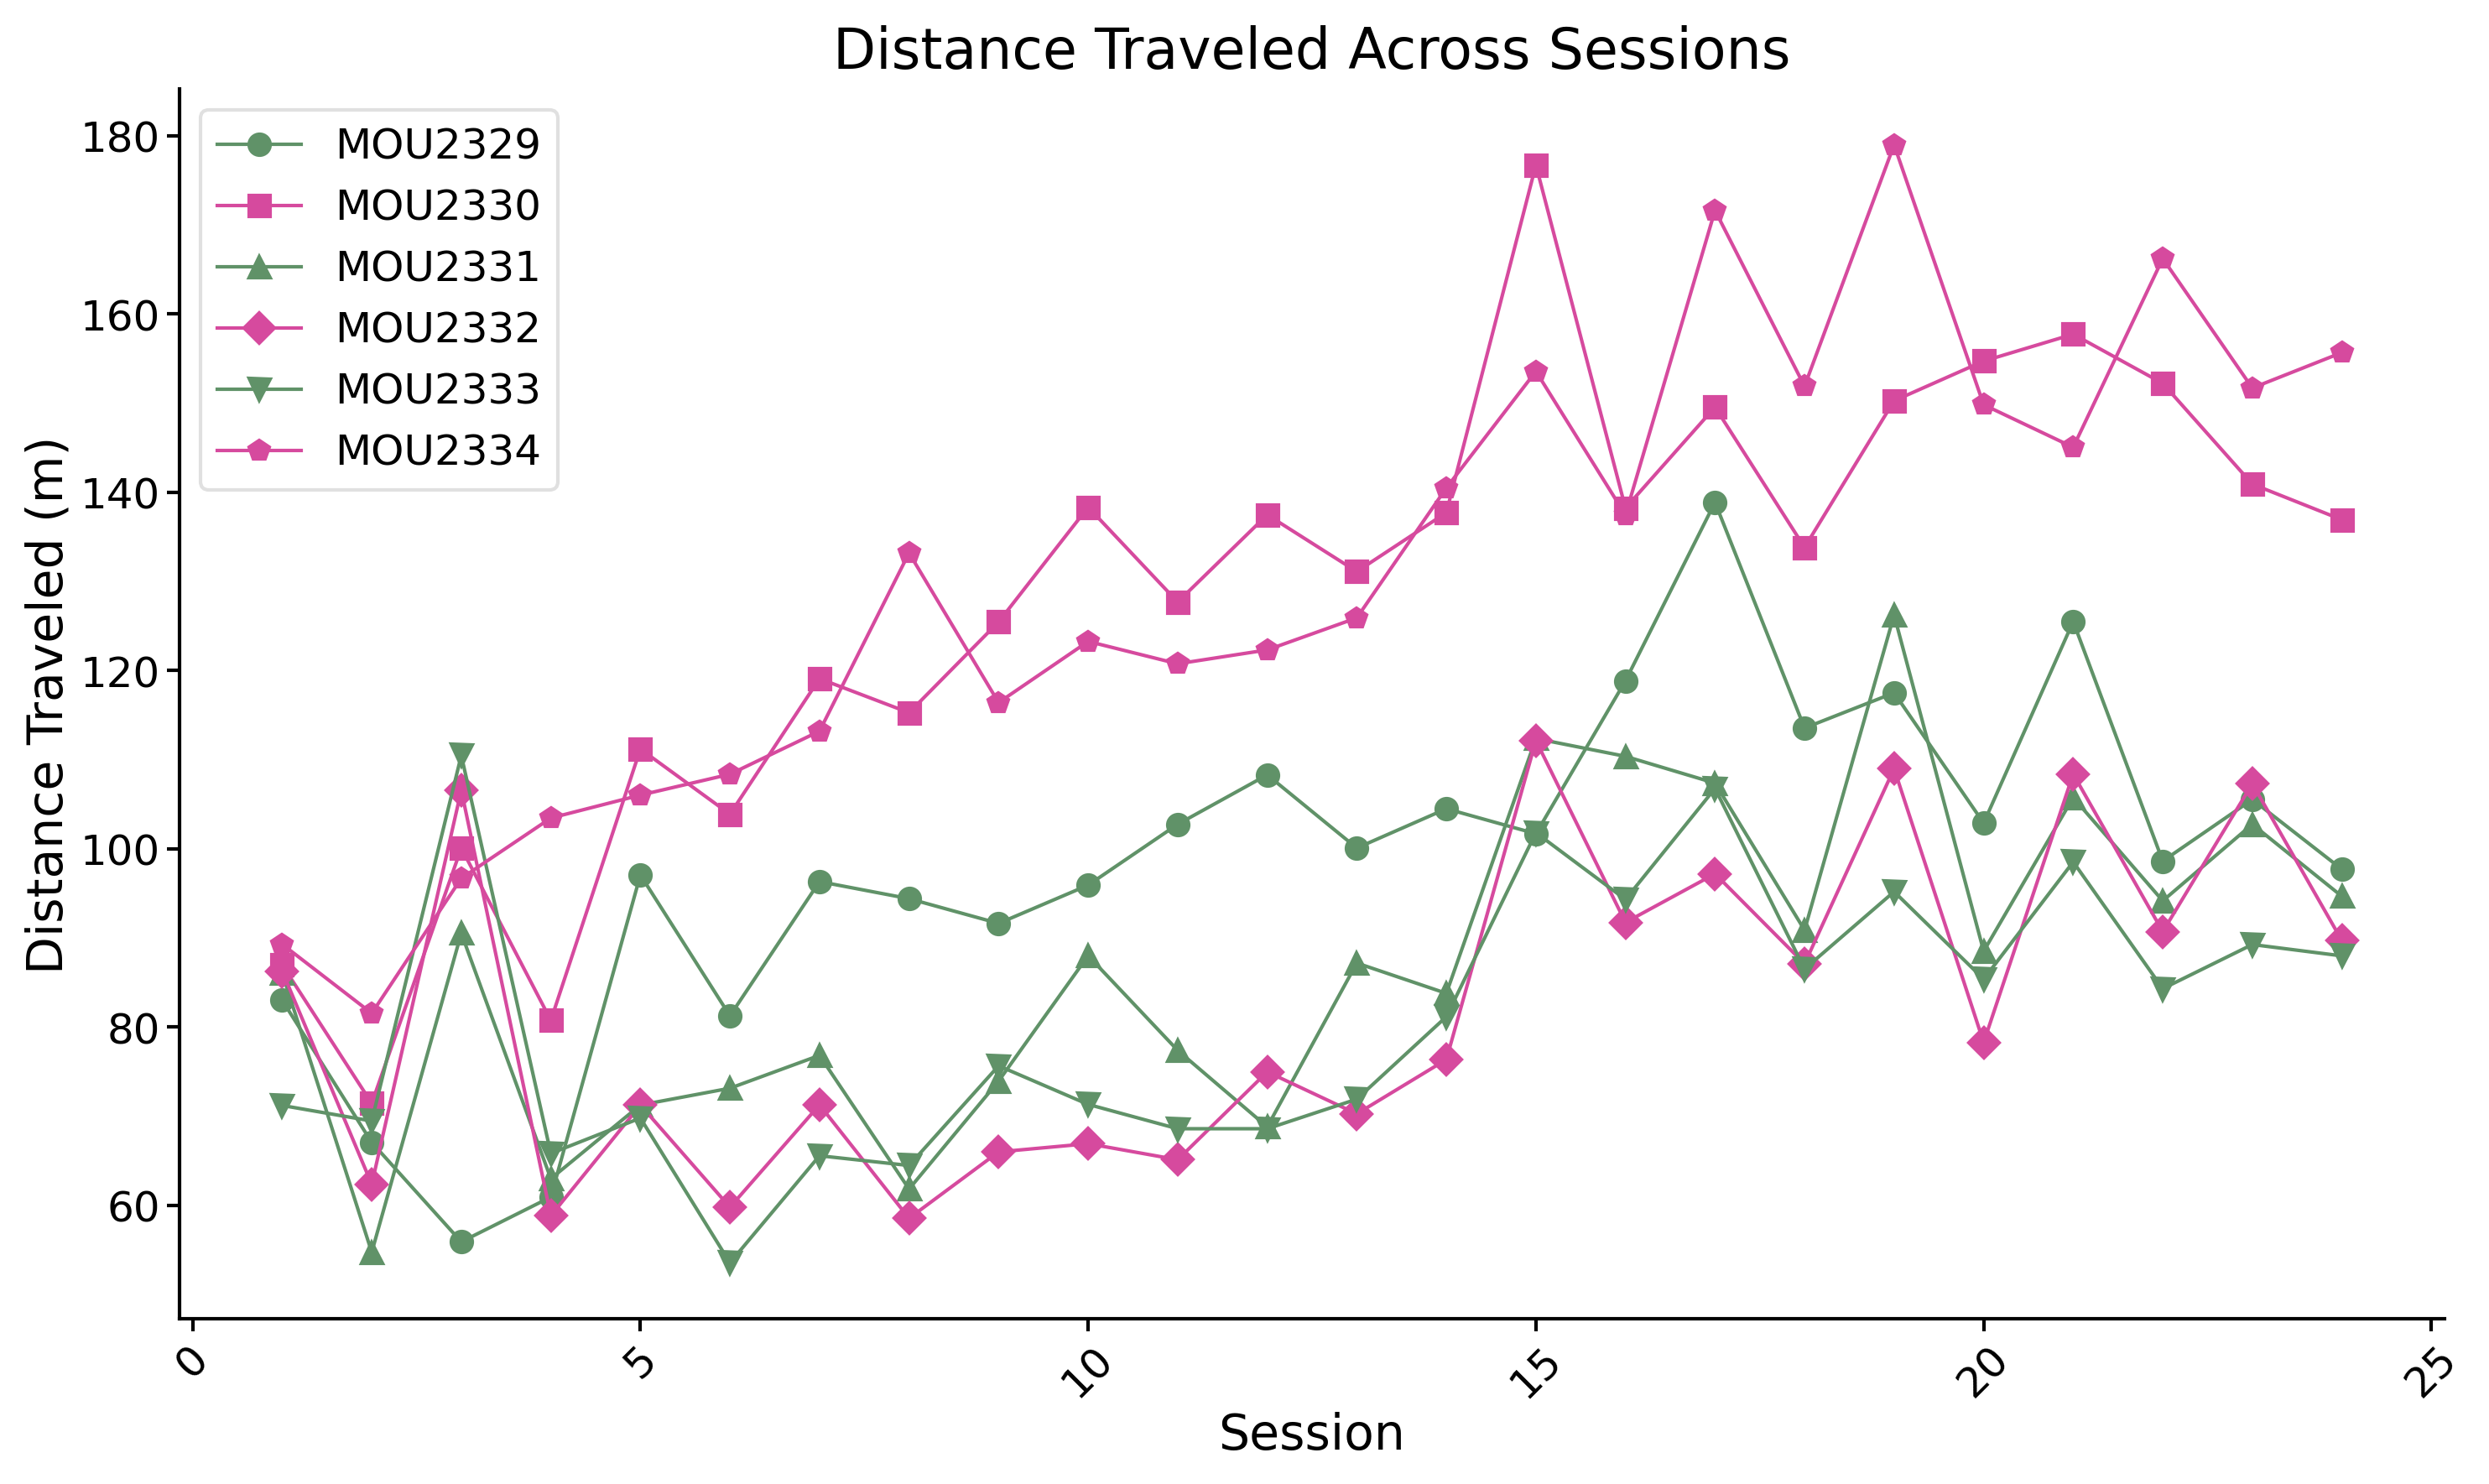

/tmp/ipykernel_73327/832054109.py:65: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


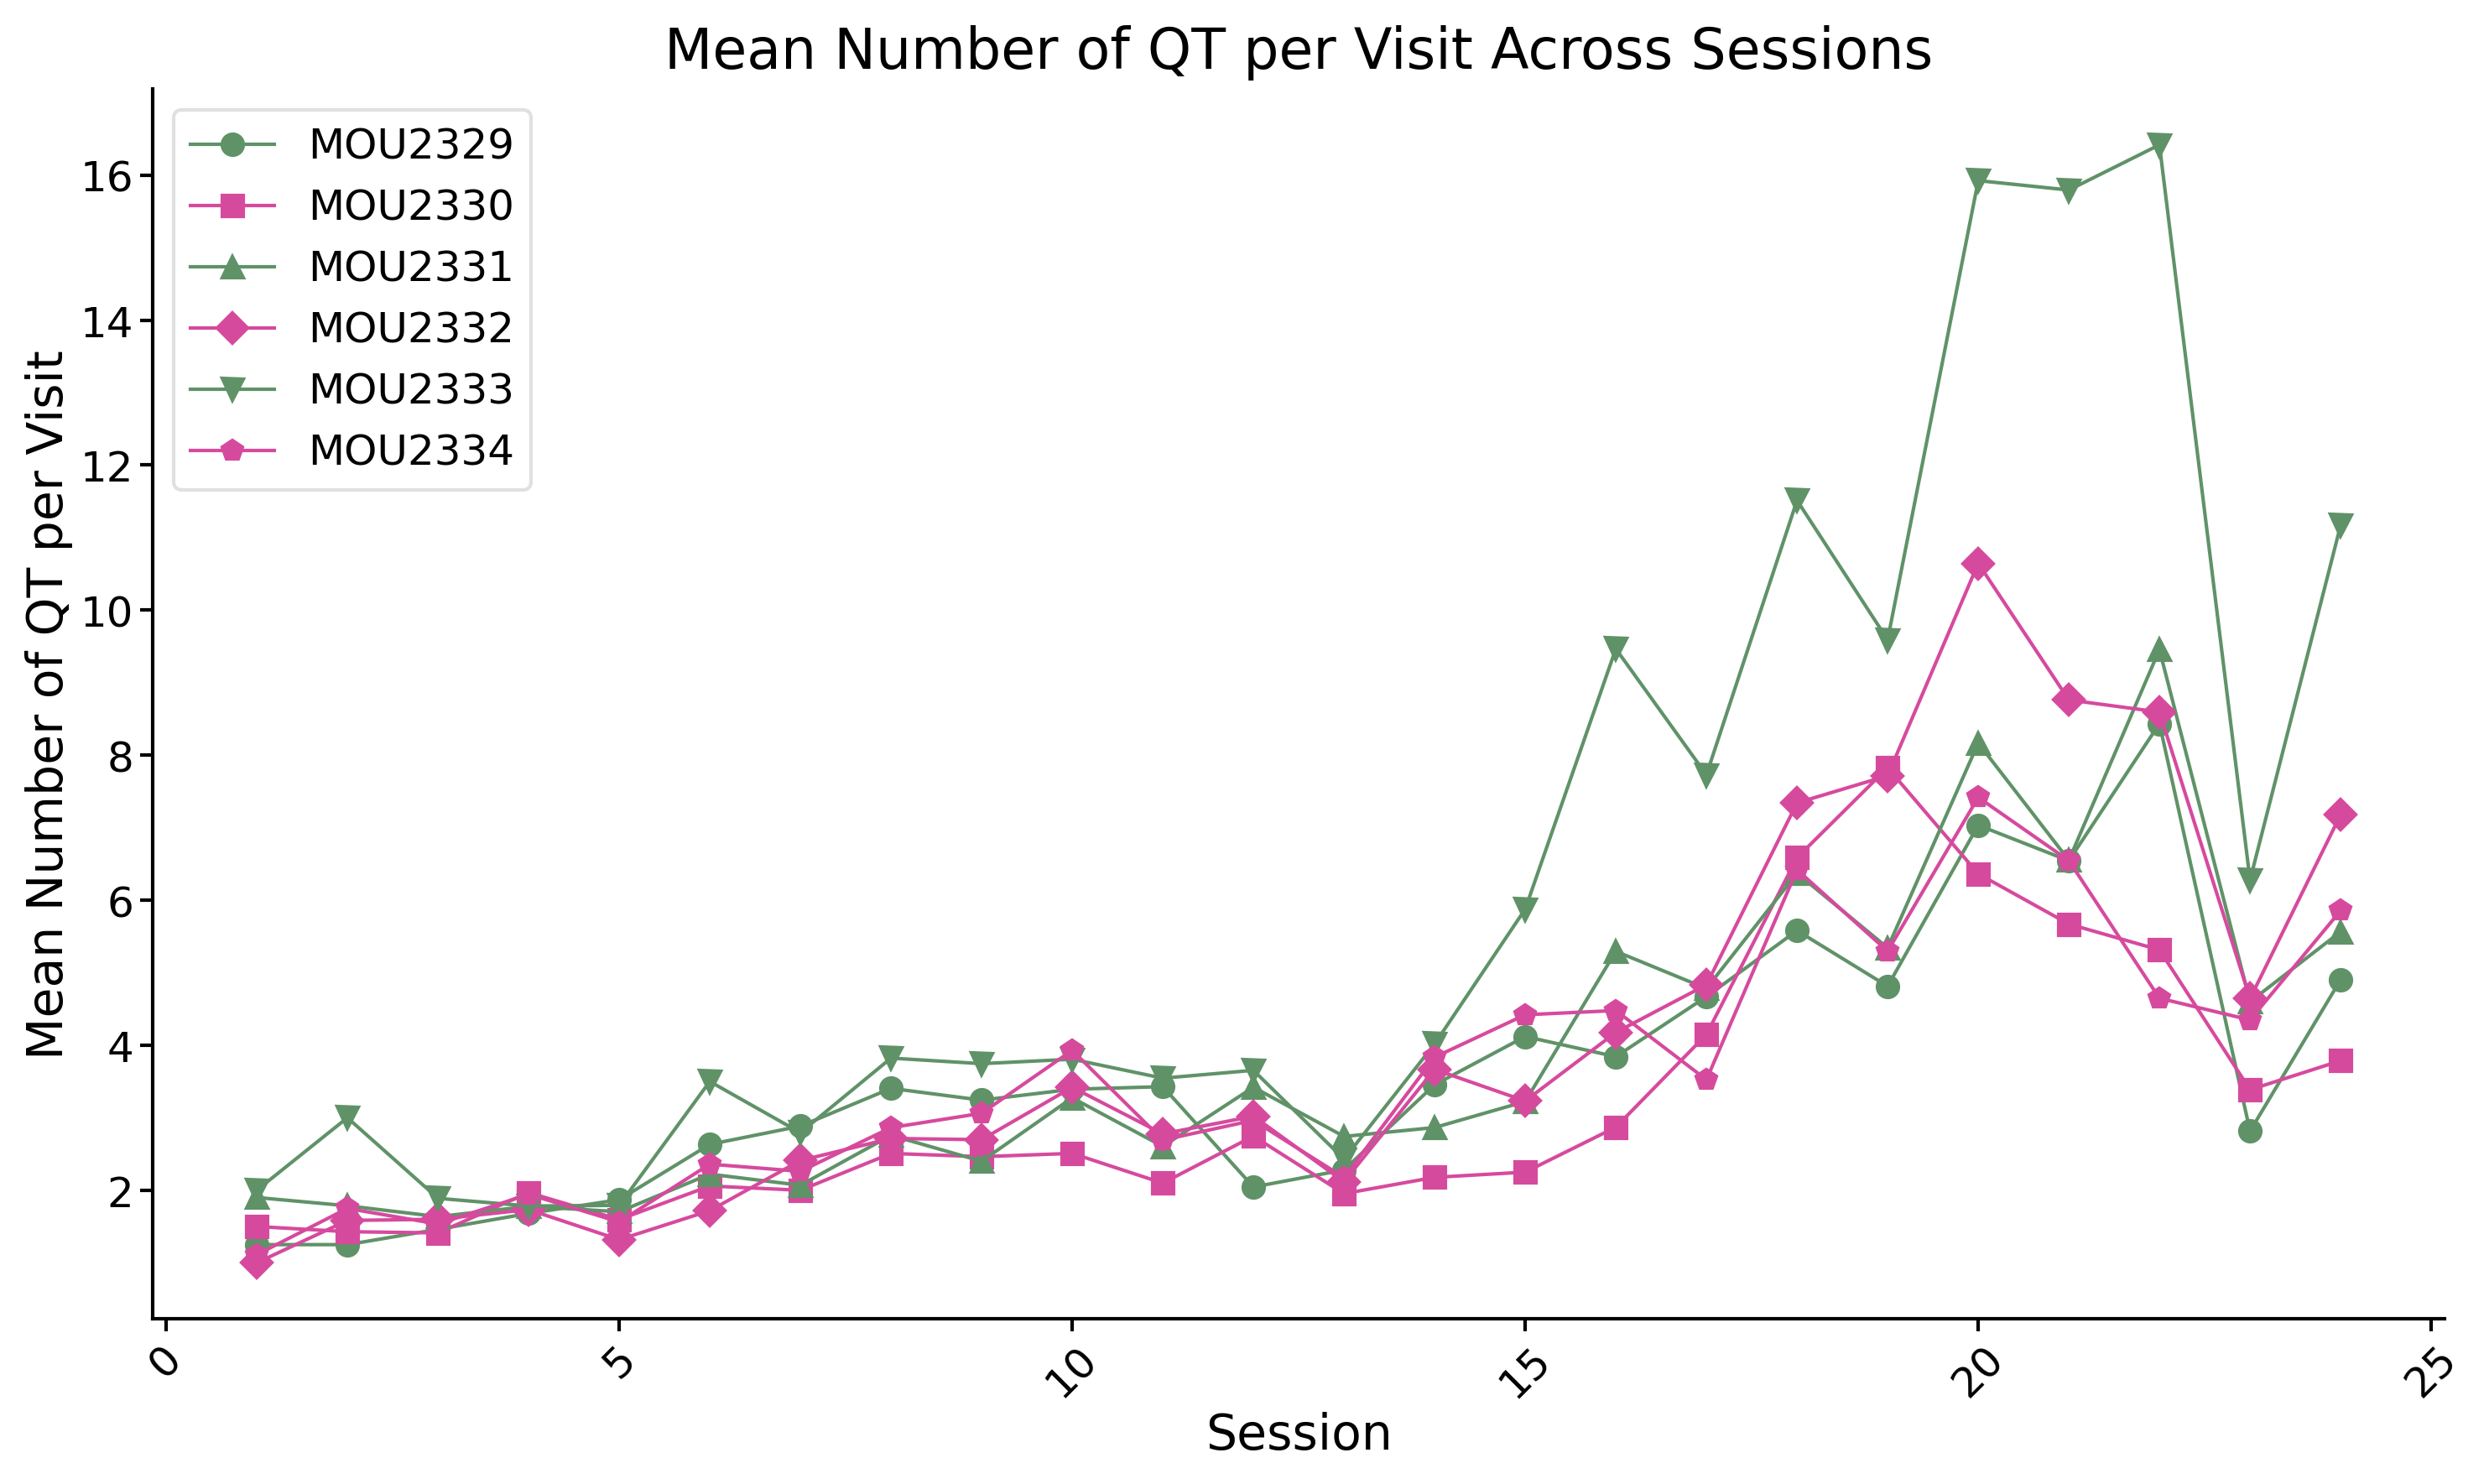

/tmp/ipykernel_73327/832054109.py:89: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


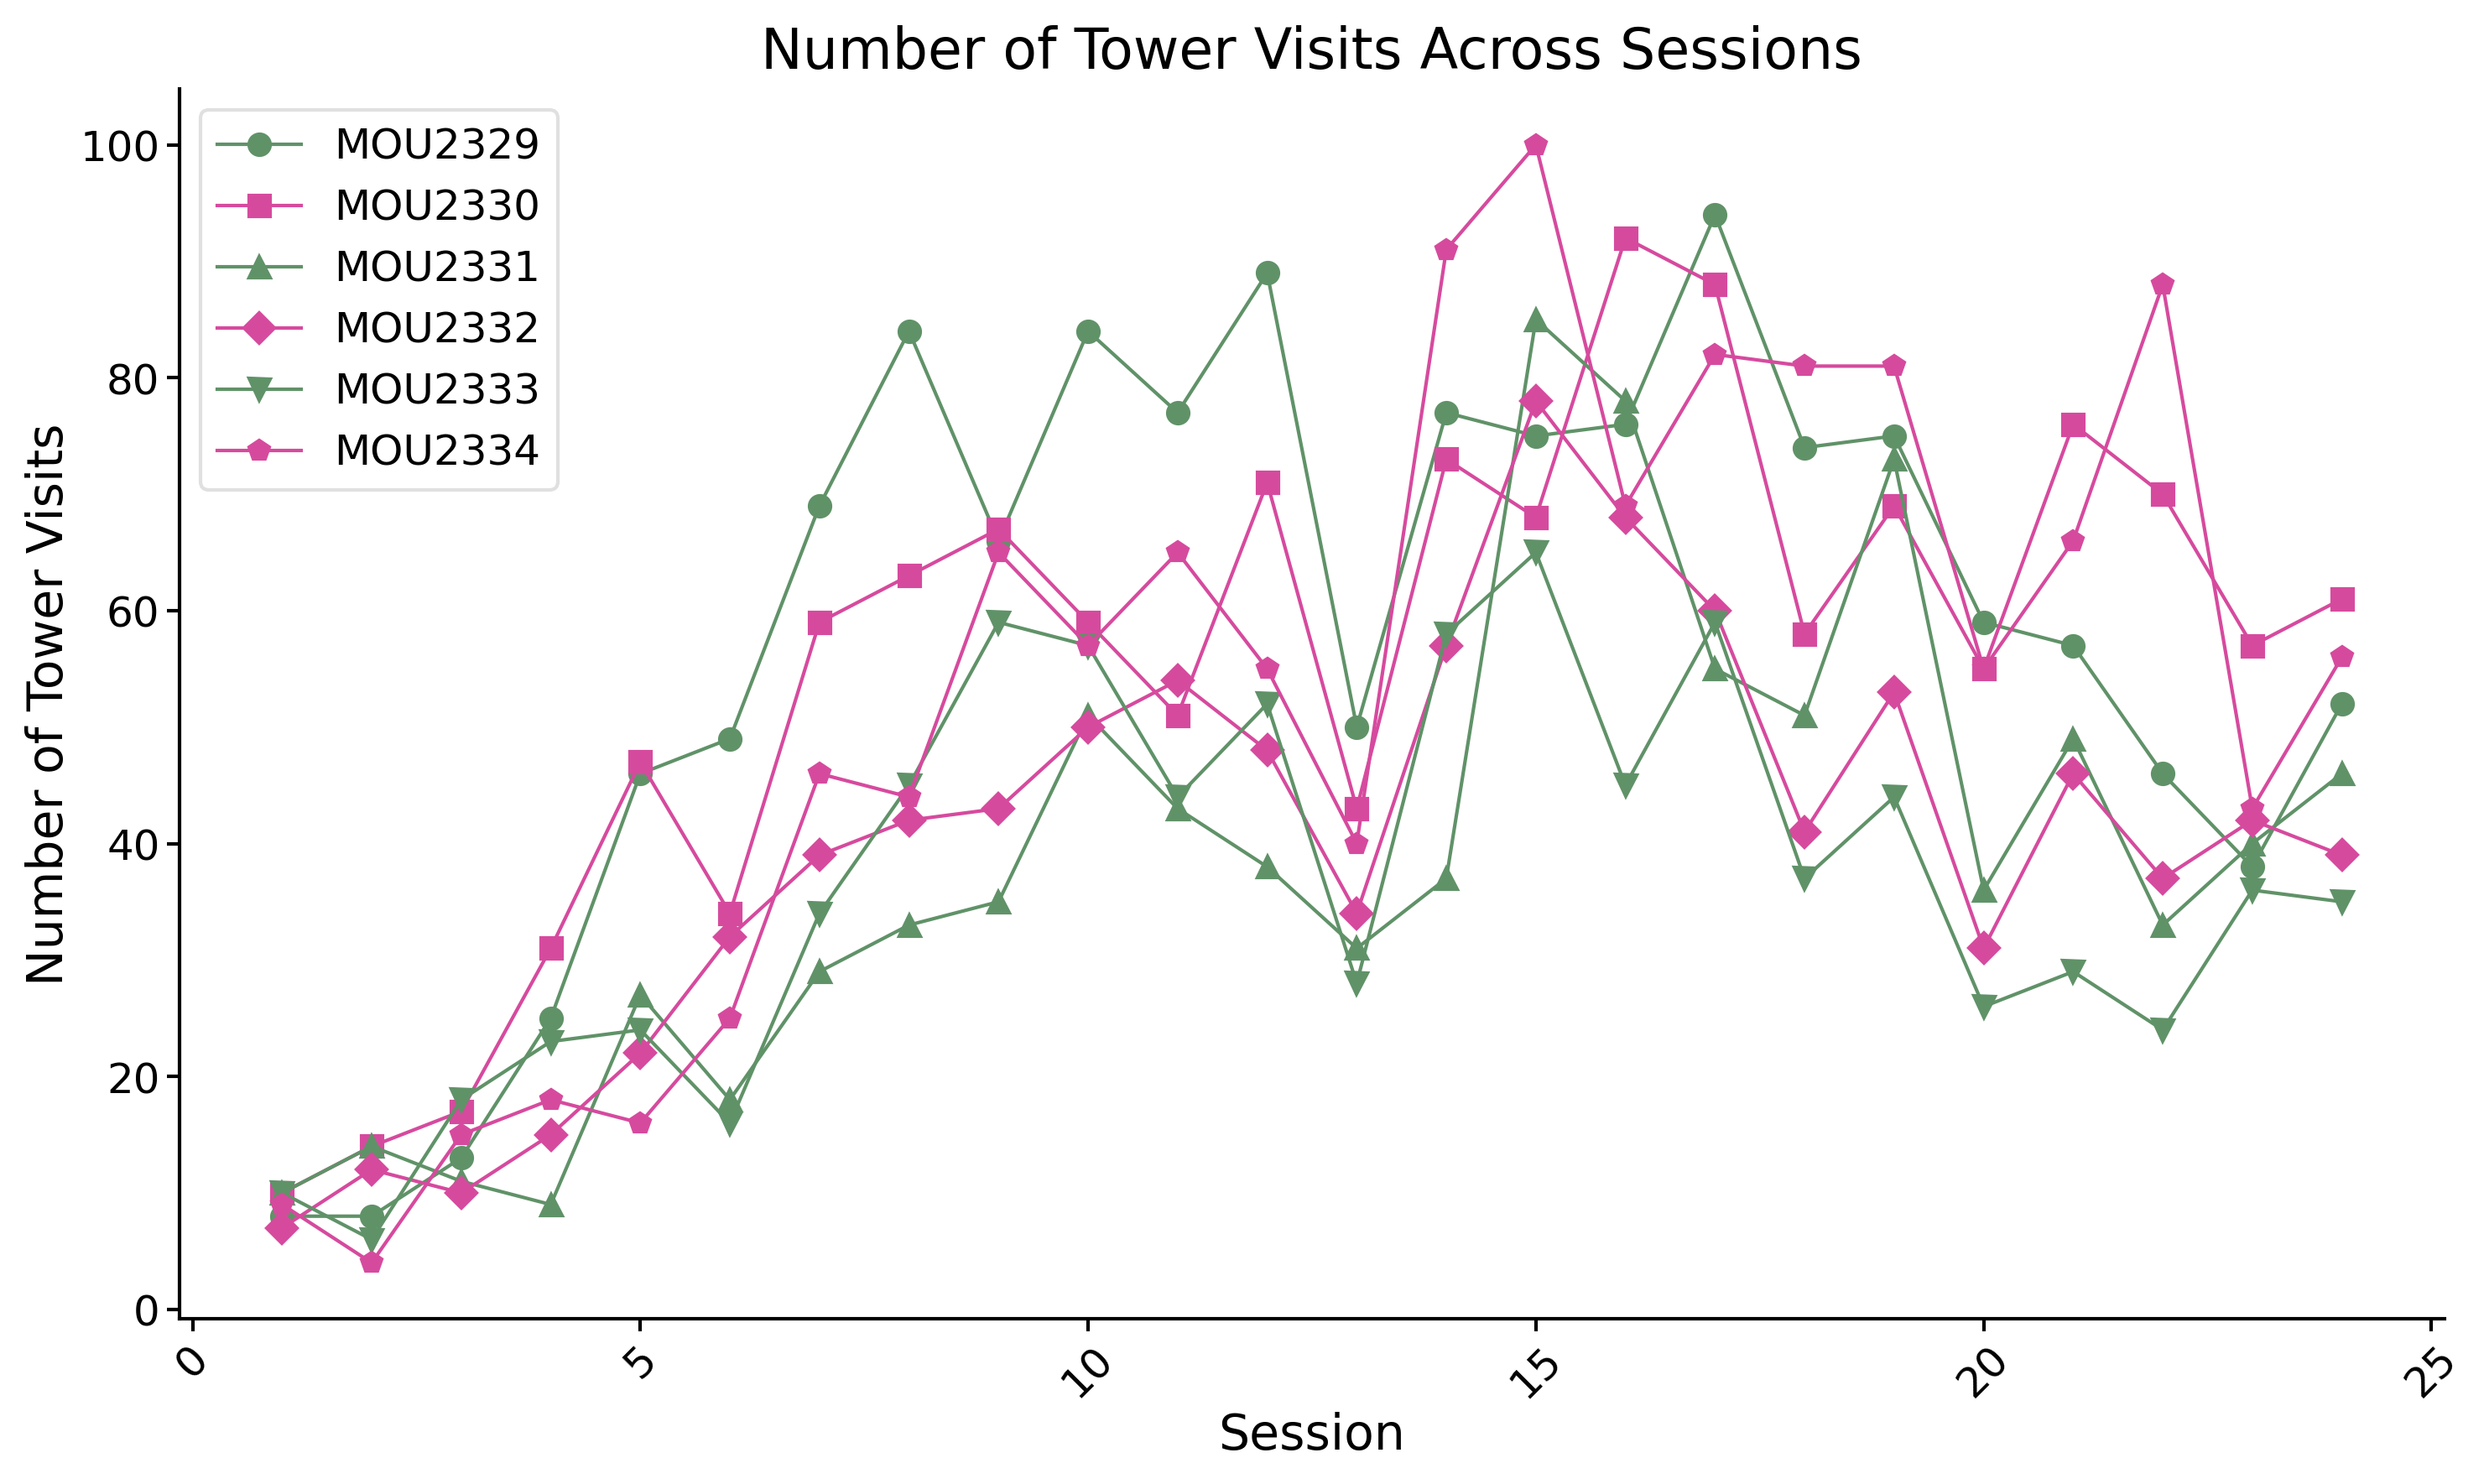

/tmp/ipykernel_73327/832054109.py:113: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


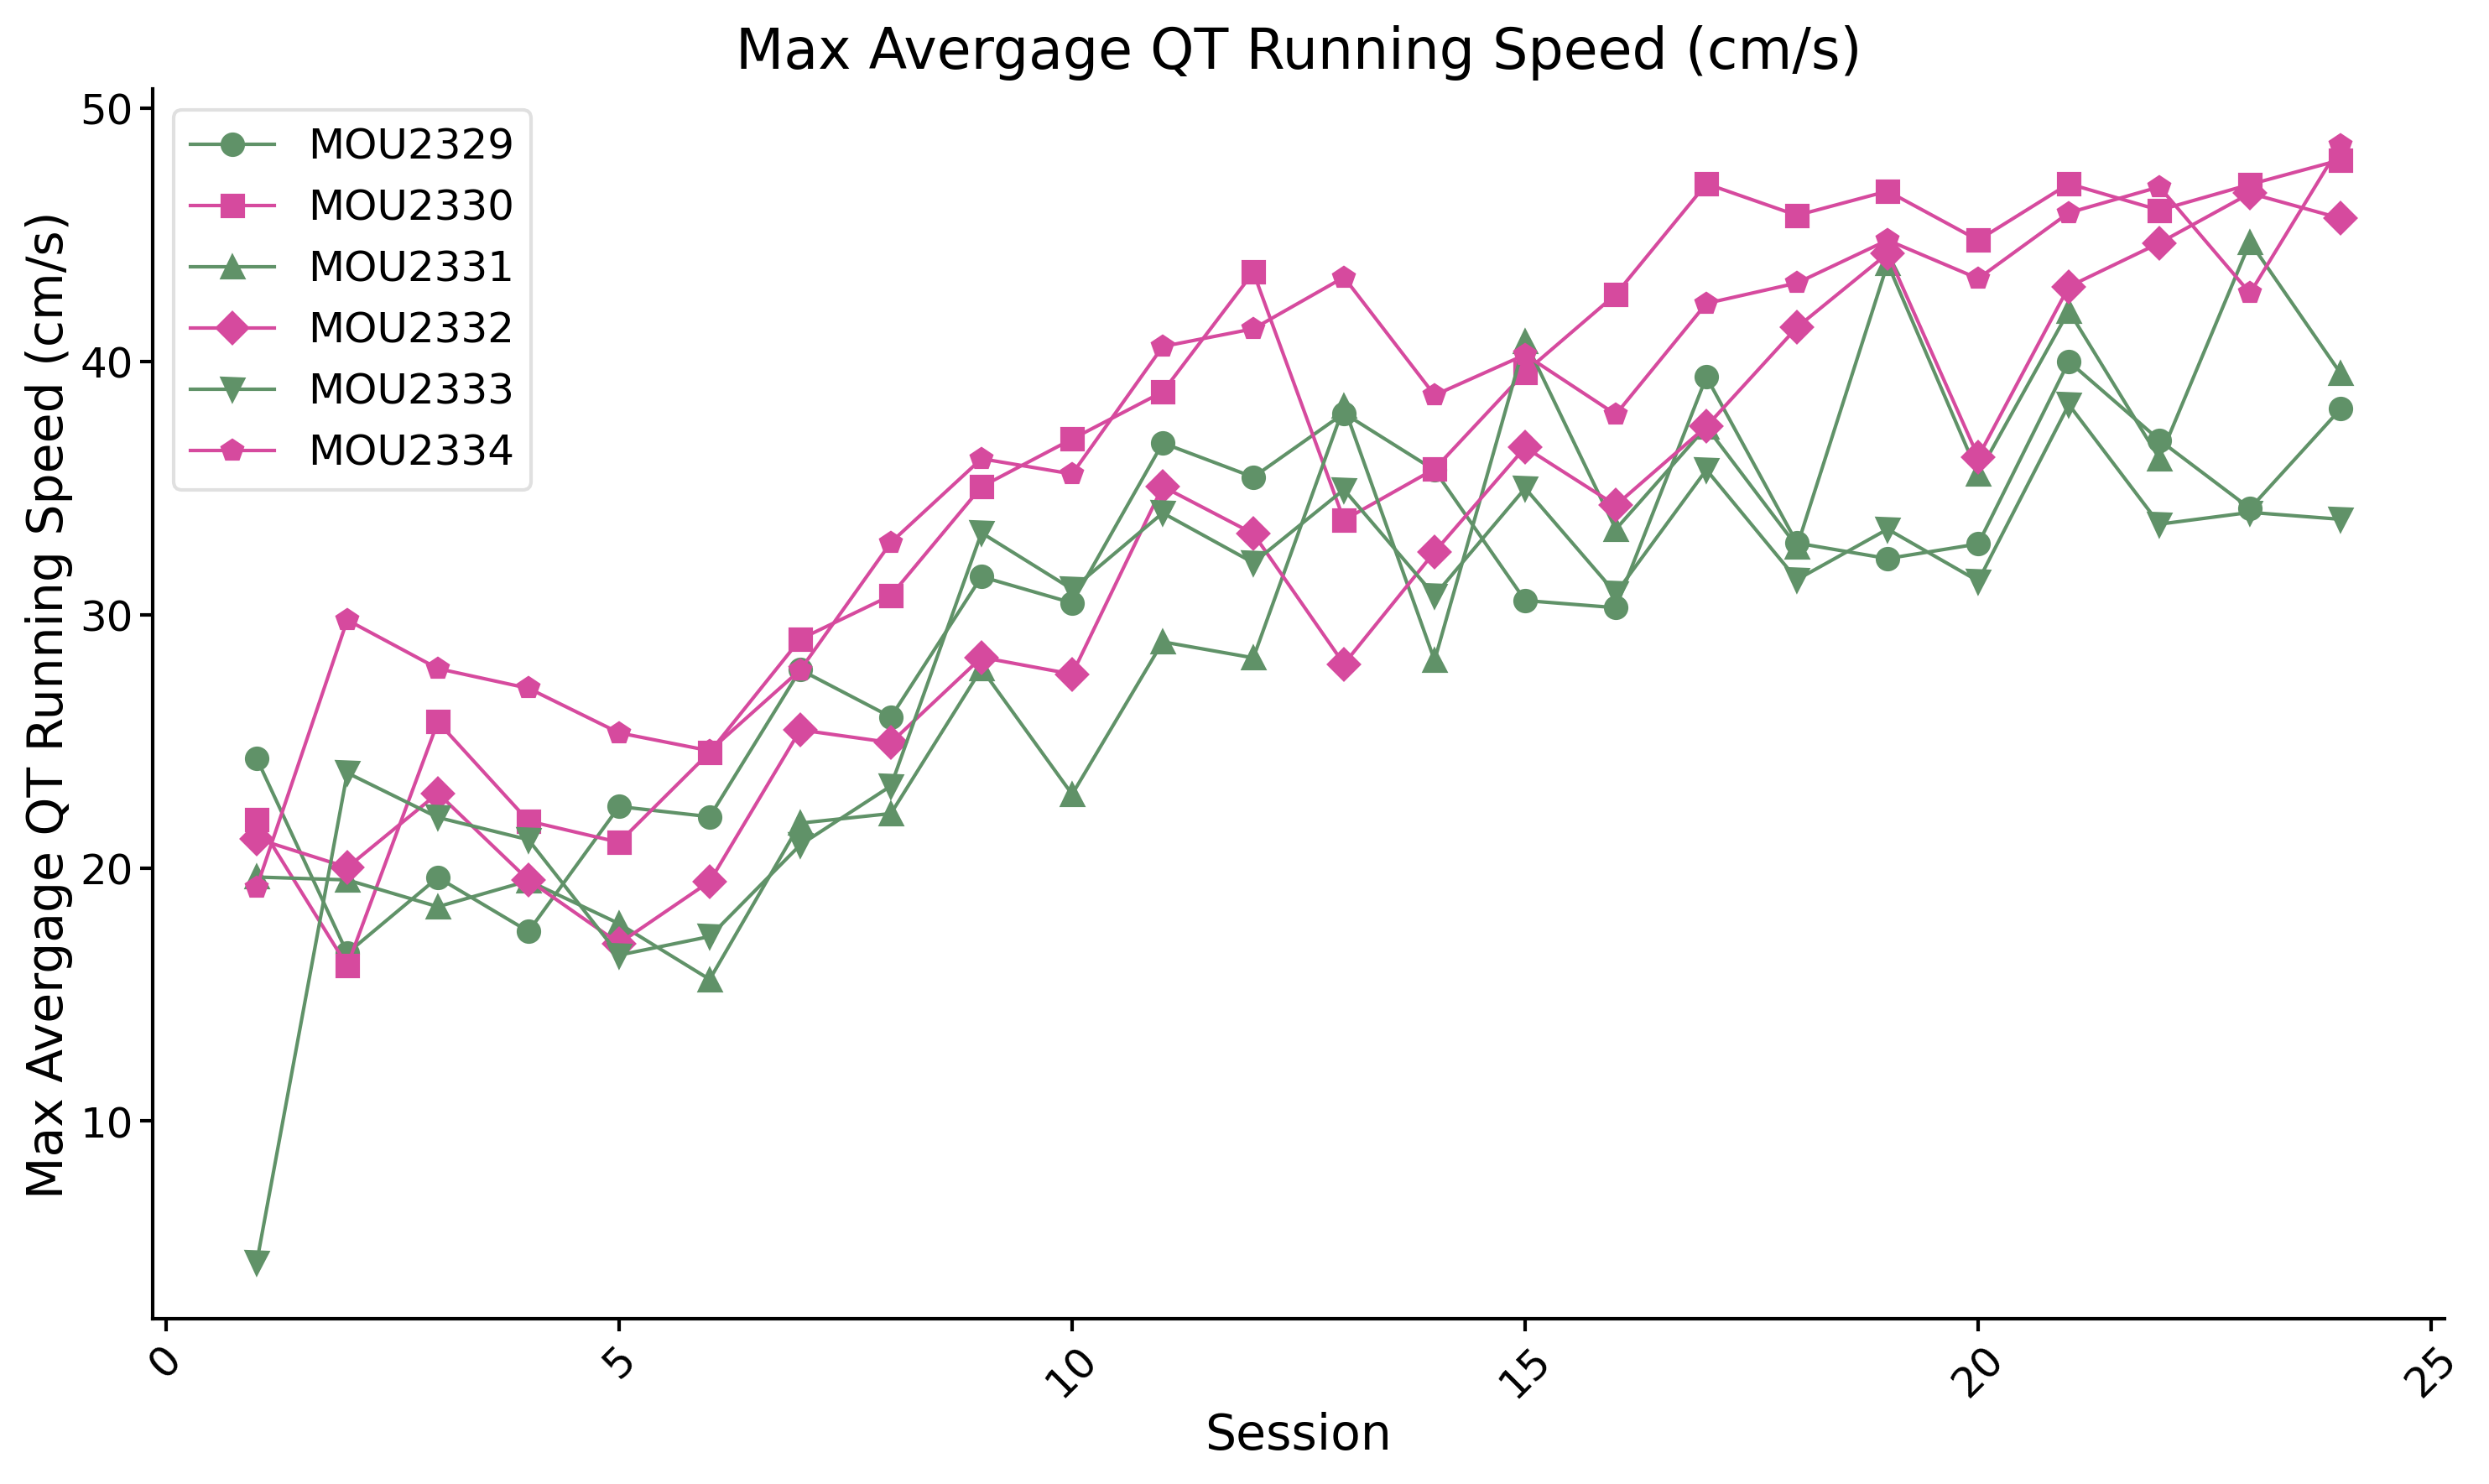

/tmp/ipykernel_73327/832054109.py:135: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


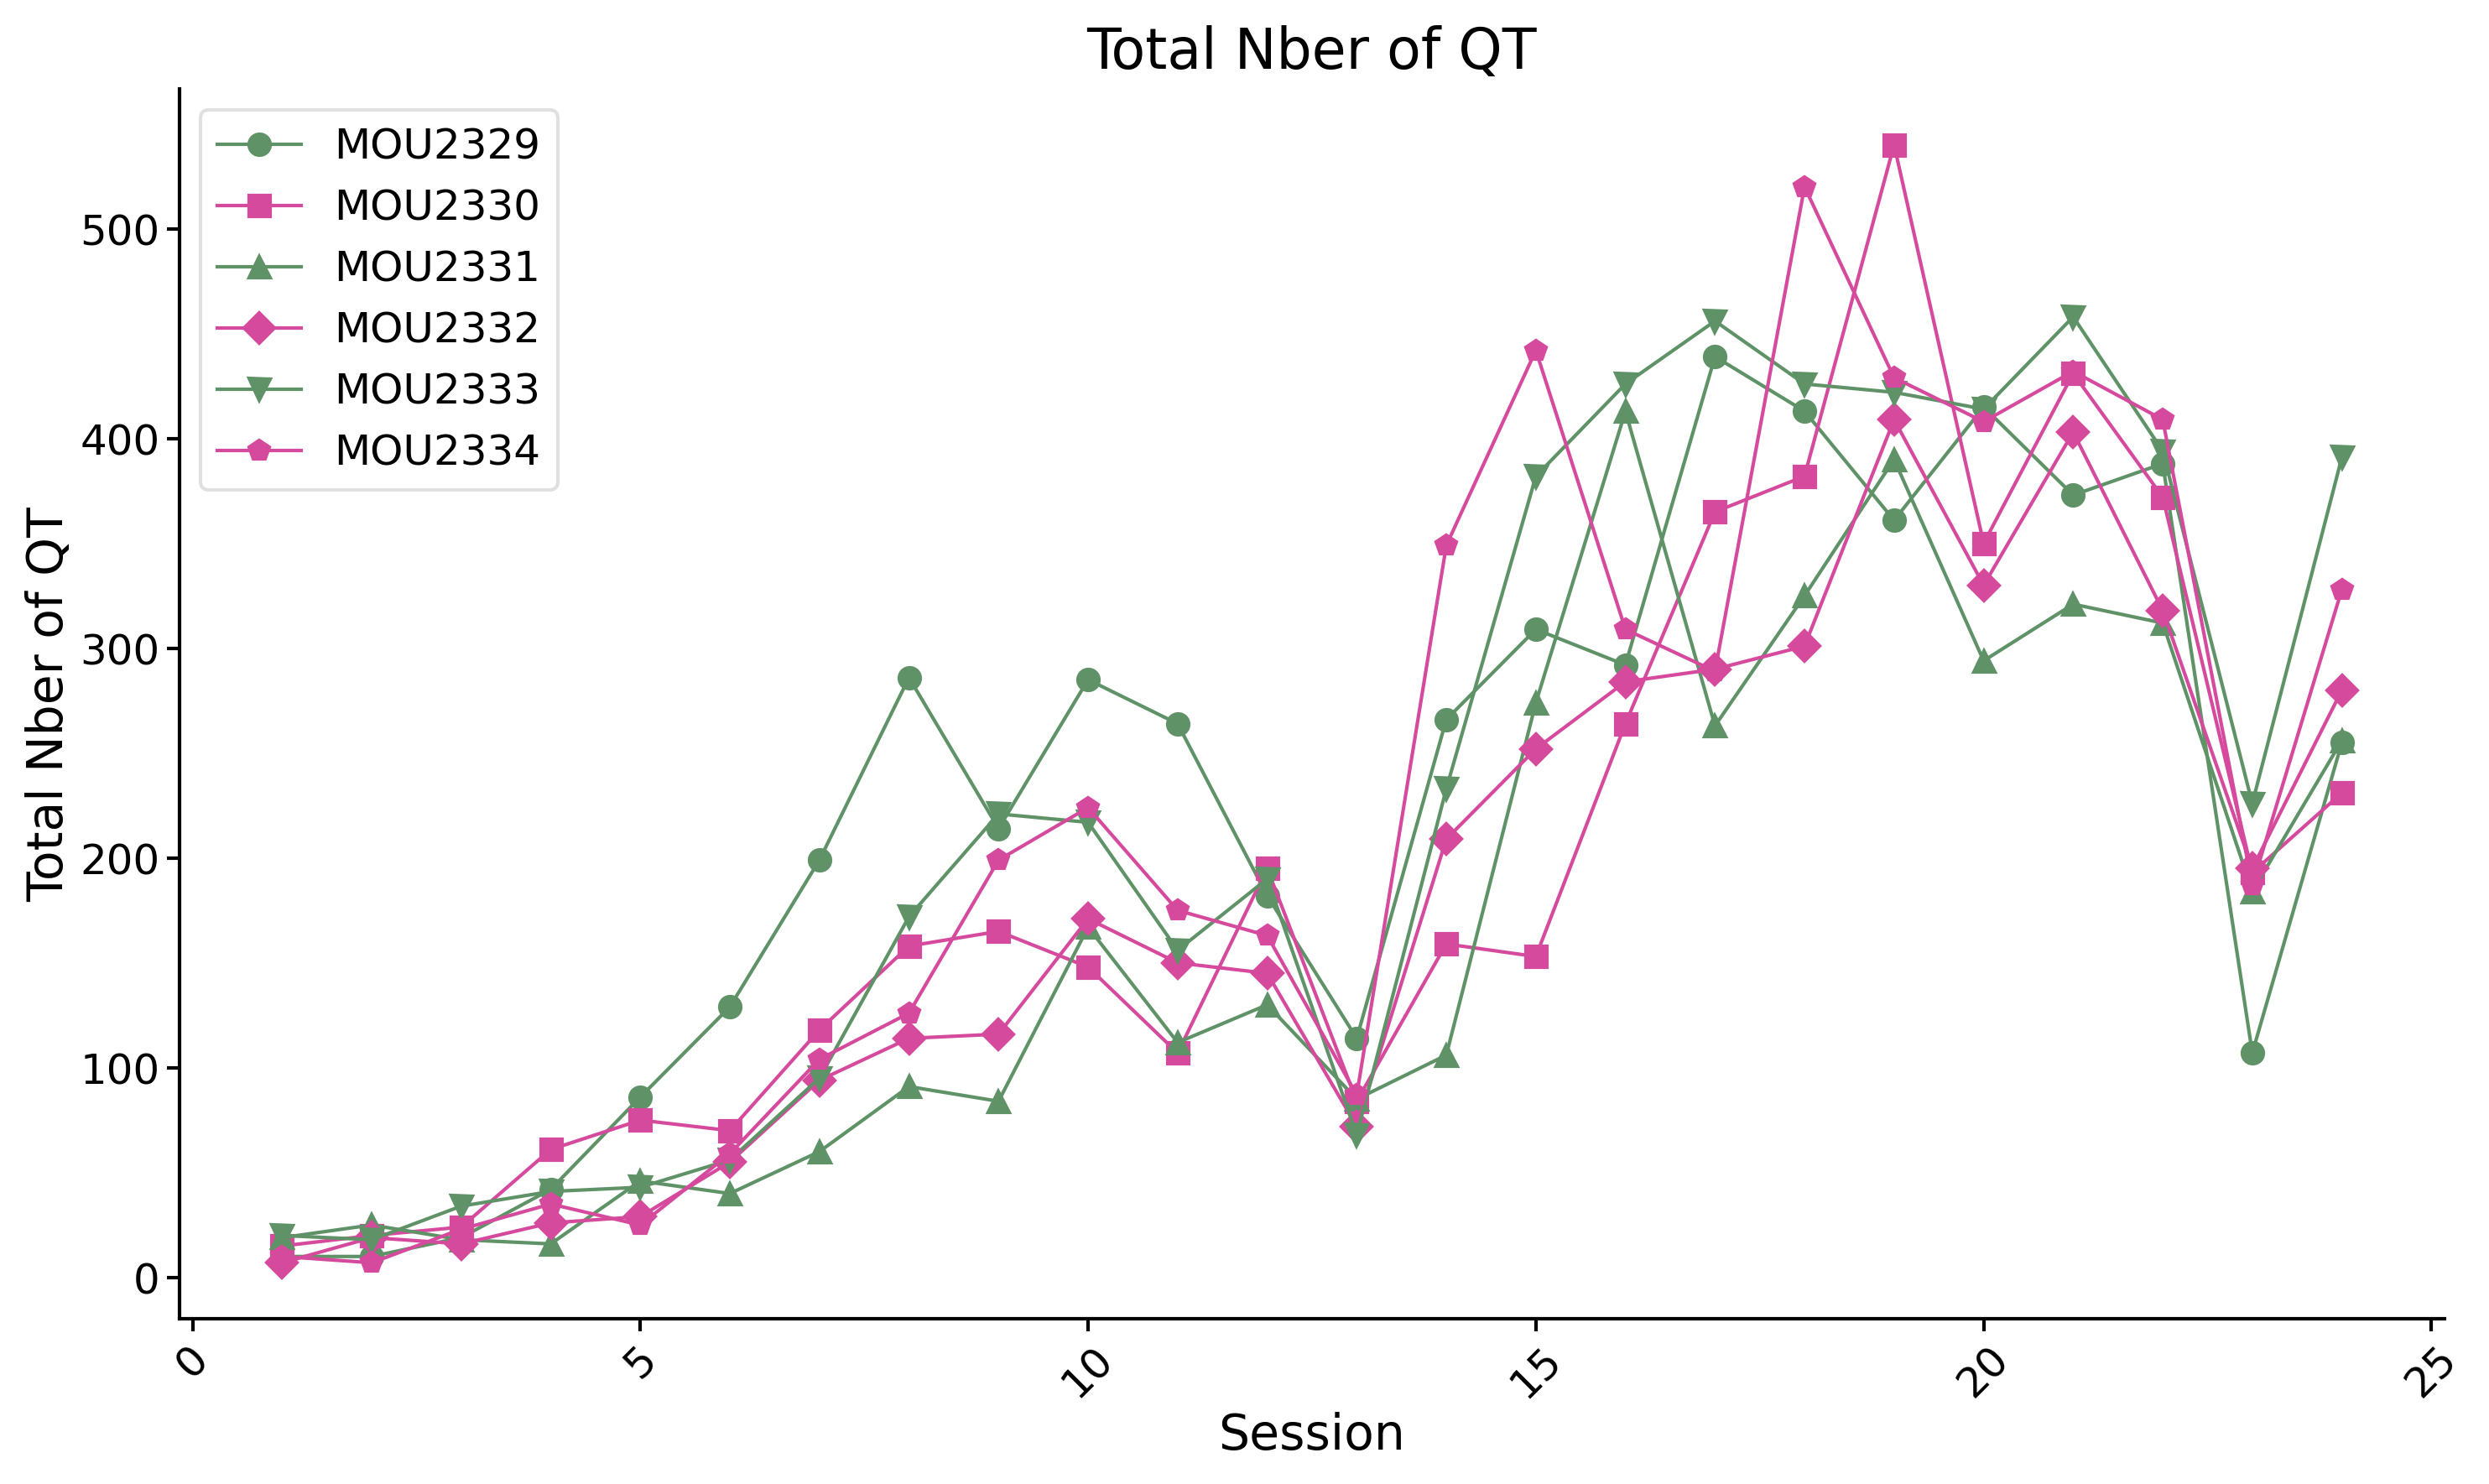

In [ ]:
# this cell plots 5 behavioral features across animals and session. 
# If you want to plot something else fine but share it with others 



# Mapping odd and even mice names to colors
mice_colors = {}
for idx, mouse in enumerate(['MOU2329', 'MOU2330', 'MOU2331', 'MOU2332', 'MOU2333', 'MOU2334']):
    if idx % 2 == 0:
        mice_colors[mouse] = '#609268'
    else:
        mice_colors[mouse] = '#D64A9E'

# List of markers to use for different mice
markers = ['o', 's', '^', 'D', 'v', 'p']

# Mapping mice to markers
mice_markers = {}
for idx, mouse in enumerate(['MOU2329', 'MOU2330', 'MOU2331', 'MOU2332', 'MOU2333', 'MOU2334']):
    mice_markers[mouse] = markers[idx % len(markers)]

# Plotting distance_traveled across sessions for each mouse
plt.figure(figsize=(10, 6))
for mouse, sessions_data in data.items():
    distances = []
    session_numbers = []

    # Enumerate through the sorted session keys
    for session_number, session in enumerate(sorted(sessions_data.keys()), start=1):
        if 'distance_traveled' in sessions_data[session]:
            distances.append(sessions_data[session]['distance_traveled'])
            session_numbers.append(session_number)
    plt.plot(session_numbers, distances, marker=mice_markers[mouse], linestyle='-', color=mice_colors[mouse], label=mouse)

plt.title('Distance Traveled Across Sessions', fontsize=16)
plt.xlabel('Session', fontsize=14)
plt.ylabel('Distance Traveled (m)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Plotting mean_nber_of_QT_per_visit across sessions for each mouse
plt.figure(figsize=(10, 6))
for mouse, sessions_data in data.items():
    means_nber_of_QT_per_visit = []
    session_numbers = []

    # Enumerate through the sorted session keys
    for session_number, session in enumerate(sorted(sessions_data.keys()), start=1):
        if 'consecutive_quarter_turns' in sessions_data[session]:
            tower_visits = sessions_data[session]['consecutive_quarter_turns']
            mean_nber_of_QT_per_visit = np.mean([visit[3] for visit in tower_visits])
            means_nber_of_QT_per_visit.append(mean_nber_of_QT_per_visit)
            session_numbers.append(session_number)
    plt.plot(session_numbers, means_nber_of_QT_per_visit, marker=mice_markers[mouse], linestyle='-', color=mice_colors[mouse], label=mouse)

plt.title('Mean Number of QT per Visit Across Sessions', fontsize=16)
plt.xlabel('Session', fontsize=14)
plt.ylabel('Mean Number of QT per Visit', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Plotting nber_of_tower_visits across sessions for each mouse
plt.figure(figsize=(10, 6))
for mouse, sessions_data in data.items():
    visits = []
    session_numbers = []

    # Enumerate through the sorted session keys
    for session_number, session in enumerate(sorted(sessions_data.keys()), start=1):
        if 'consecutive_quarter_turns' in sessions_data[session]:
            tower_visits = sessions_data[session]['consecutive_quarter_turns']
            nber_of_tower_visits = len(tower_visits)
            visits.append(nber_of_tower_visits)
            session_numbers.append(session_number)
    plt.plot(session_numbers, visits, marker=mice_markers[mouse], linestyle='-', color=mice_colors[mouse], label=mouse)

plt.title('Number of Tower Visits Across Sessions', fontsize=16)
plt.xlabel('Session', fontsize=14)
plt.ylabel('Number of Tower Visits', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Plotting max_runningspeed across sessions for each mouse
plt.figure(figsize=(10, 6))
for mouse, sessions_data in data.items():
    max_runningspeeds = []
    session_numbers = []

    # Enumerate through the sorted session keys
    for session_number, session in enumerate(sorted(sessions_data.keys()), start=1):
        if 'speed_profile_qt' in sessions_data[session]:
            speedprofile = sessions_data[session]['speed_profile_qt']
            max_runningspeed = max(speedprofile[1])
            max_runningspeeds.append(max_runningspeed)
            session_numbers.append(session_number)
    plt.plot(session_numbers, max_runningspeeds, marker=mice_markers[mouse], linestyle='-', color=mice_colors[mouse], label=mouse)

plt.title('Max Avergage QT Running Speed (cm/s)', fontsize=16)
plt.xlabel('Session', fontsize=14)
plt.ylabel('Max Avergage QT Running Speed (cm/s)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Plotting total number of QT across sessions for each mouse
plt.figure(figsize=(10, 6))
for mouse, sessions_data in data.items():
    total_nb_QT = []
    session_numbers = []

    # Enumerate through the sorted session keys
    for session_number, session in enumerate(sorted(sessions_data.keys()), start=1):
        if 'total_nb_QT_types' in sessions_data[session]:
            total_nb_QT.append(sessions_data[session]['total_nb_QT_types']['clock_number']+sessions_data[session]['total_nb_QT_types']['anti_clock_number'])
            session_numbers.append(session_number)
    plt.plot(session_numbers, total_nb_QT, marker=mice_markers[mouse], linestyle='-', color=mice_colors[mouse], label=mouse)

plt.title('Total Nber of QT', fontsize=16)
plt.xlabel('Session', fontsize=14)
plt.ylabel('Total Nber of QT', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


# Below is some leftovers of toying with the data you may find usefull

In [15]:
#play with other pickles:
pathtopicklefolder='/Users/davidrobbe/Documents/Science/Data/ForagingMice/MOU2331/MOU2331_20240614-1416/Pickle_data'

# List all files in the current directory
os.chdir(pathtopicklefolder)
files_in_directory = os.listdir()

# Filter out the pickle files
pickle_files = [file for file in files_in_directory if file.endswith('.pkl')]

# Print the list of pickle files
for pickle_file in pickle_files:
    print(pickle_file)

file_to_load = pickle_files[0]
print(f"\nLoading pickle file: {file_to_load}")

# Open and load the pickle file
with open(file_to_load, 'rb') as f:
    loaded_data = pickle.load(f)

# Print the loaded data to verify
print("\nLoaded data from the pickle file:")
print(loaded_data)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/davidrobbe/Documents/Science/Data/ForagingMice/MOU2331/MOU2331_20240614-1416/Pickle_data'

In [61]:
loaded_data['CCW_turn']

58

In [47]:
file_to_load = pickle_files[4]
print(f"\nLoading pickle file: {file_to_load}")

# Open and load the pickle file
with open(file_to_load, 'rb') as f:
    loaded_data = pickle.load(f)

# Print the loaded data to verify
print("\nLoaded data from the pickle file:")
print(loaded_data)


Loading pickle file: speed_profile_qt.pkl

Loaded data from the pickle file:
(array([0.        , 0.04176389, 0.08352778, 0.12529167, 0.16705556,
       0.20881944, 0.25058333, 0.29234722, 0.33411111, 0.375875  ,
       0.41763889, 0.45940278, 0.50116667, 0.54293056, 0.58469444,
       0.62645833, 0.66822222, 0.70998611, 0.75175   ]), array([ 4.03551031,  7.57385585, 12.65288707, 16.57606241, 20.86352018,
       22.93282884, 23.91622051, 27.59760919, 28.29293096, 25.3167012 ,
       22.70488691, 20.61199731, 16.81408398, 14.64418373, 12.68931781,
       10.6734239 ,  7.6712783 ,  5.11474684,  1.83559465]))


In [62]:
file_to_load = pickle_files[7]
print(f"\nLoading pickle file: {file_to_load}")

# Open and load the pickle file
with open(file_to_load, 'rb') as f:
    loaded_data = pickle.load(f)

# Print the loaded data to verify
print("\nLoaded data from the pickle file:")
print(loaded_data)


Loading pickle file: total_nb_QT_types.pkl

Loaded data from the pickle file:
{'reward_number': 85, 'unreward_number': 45, 'extra_number': 0, 'bad_direction_number': 8, 'bad_object_number': 4, 'bad_objectdirection_number': 2, 'depleting_number': 31, 'timeout_number': 0, 'anti_clock_number': 58, 'clock_number': 72}


In [63]:
loaded_data['clock_number']+loaded_data['anti_clock_number']

130

In [ ]:
# average speed profile
plt.figure(figsize=(10, 6))
plt.plot(loaded_data[0], loaded_data[1], marker='o', linestyle='-', color='b')